In [2]:
import pickle
import matplotlib.pyplot as plt
import numpy as np

# $\vartheta$

In [6]:
L_list=[8,16,32,64,128,]
vartheta=np.linspace(0.01,0.49,21)
MI={}
for L in L_list:
    with open(f'class_A_vartheta(0.01,0.49,21)_En1000_L{L}_t{L}.pickle','rb') as f:
        rs=pickle.load(f)
        MI[L]=rs['MI']
        

In [7]:
# L_list=[8,16,32,64,128,]
vartheta=np.linspace(0.01,0.49,21)
# MI={}
for L in [256,]:
    with open(f'class_A_vartheta(0.01,0.49,11)_En1000_L{L}_t{L}.pickle','rb') as f:
        rs=pickle.load(f)
        MI[L]=rs['MI']
        

In [4]:
L=256
with open(f'class_A_vartheta(0.25,0.25,1)_En1000_L{L}_t{L}.pickle','rb') as f:
    rs=pickle.load(f)
    MI[L]=rs['MI']

In [5]:
L=256
with open(f'class_A_vartheta(0.25,0.25,1)_En1000_L{L}_t{L}.pickle.bak','rb') as f:
    rs=pickle.load(f)
    zz=rs['MI']

Text(0, 0.5, '$I_2(|L/4|:|L/4|)$')

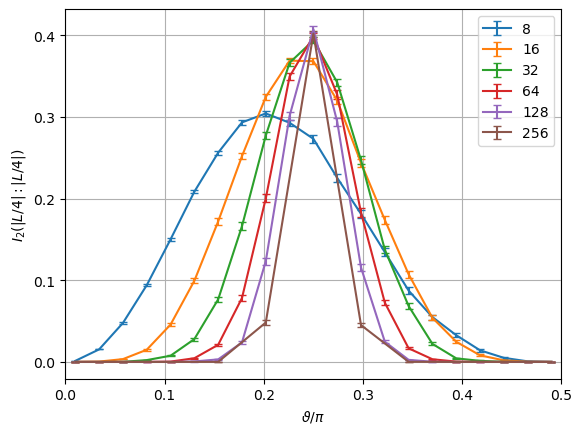

In [14]:
fig,ax=plt.subplots()
L_list=[8,16,32,64,128,256]
for L in L_list:
    vartheta=np.linspace(0.01,0.49,MI[L].shape[0])
    ax.errorbar(x=vartheta,y=MI[L].mean(axis=-1),yerr=MI[L].std(axis=-1)/np.sqrt(MI[L].shape[-1]),capsize=3,label=L)
ax.legend()
ax.grid('on')
ax.set_xlim([0,0.5])
ax.set_xlabel(r'$\vartheta/\pi$')
ax.set_ylabel(r'$I_2(|L/4|:|L/4|)$')

In [12]:
np.linspace(0.25,0.25,1)

array([0.25])

In [13]:
vartheta[10]

0.25

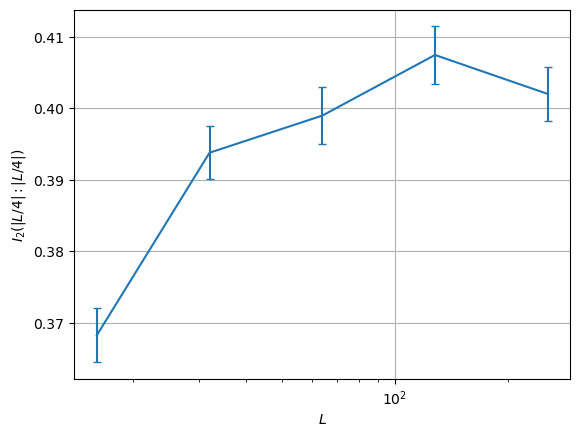

In [15]:
fig,ax=plt.subplots()
L_list=[16,32,64,128,256]
ax.errorbar(
    x=L_list,
    y=[MI[L].mean(axis=-1)[MI[L].shape[0]//2] for L in L_list],
    yerr=[MI[L].std(axis=-1)[MI[L].shape[0]//2]/np.sqrt(MI[L].shape[-1]) for L in L_list],
    capsize=3,)
# ax.legend()
ax.grid('on')
ax.set_xlabel(r'$L$')
ax.set_ylabel(r'$I_2(|L/4|:|L/4|)$')
ax.set_xscale('log')
# ax.set_xlim(1,257)
# ax.set_ylim(0,0.5)

# r

In [2]:
L_list=[8,16,32,64]
# vartheta=np.linspace(0.01,0.49,21)
MI={}
EE={}
r_list={}
for L in L_list:
    # with open(f'class_A_vartheta(0.49,0.49,1)_r(0.00,1.00,41)_En1000_L{L}_t{L}.pickle','rb') as f:
    with open(f'class_A_vartheta(0.49,0.49,1)_r(0.30,0.70,41)_En5000_L{L}_t{L}.pickle','rb') as f:
        rs=pickle.load(f)
        r_list[L]=np.linspace(rs['args'].r[0],rs['args'].r[1],int(rs['args'].r[2]))
        MI[L]=rs['MI']
        EE[L]=rs['EE']
        

Text(0, 0.5, '$I_2(|L/4|:|L/4|)$')

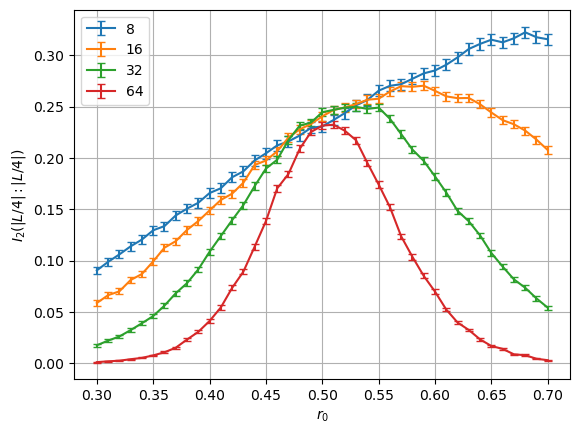

In [3]:
fig,ax=plt.subplots()
for L in L_list:
    ax.errorbar(x=r_list[L],y=np.nanmean(MI[L],axis=-1)[0],yerr=np.nanstd(MI[L],axis=-1)[0]/np.sqrt(MI[L].shape[-1]),capsize=3,label=L)
ax.legend()
ax.grid('on')
# ax.set_xlim([0.3,0.7])
ax.set_xlabel(r'$r_0$')
ax.set_ylabel(r'$I_2(|L/4|:|L/4|)$')

Text(0, 0.5, '$I_2(|L/4|:|L/4|)$')

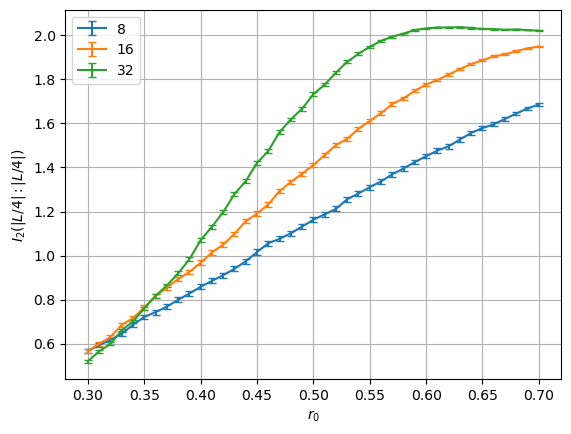

In [45]:
fig,ax=plt.subplots()
for L in L_list:
    ax.errorbar(x=r_list[L],y=np.nanmean(EE[L],axis=-1)[0]/np.log(2),yerr=np.nanstd(EE[L],axis=-1)[0]/np.sqrt(EE[L].shape[-1])/np.log(2),capsize=3,label=L)
ax.legend()
ax.grid('on')
# ax.set_xlim([0,0.5])
ax.set_xlabel(r'$r_0$')
ax.set_ylabel(r'$I_2(|L/4|:|L/4|)$')

In [6]:
[(5**x)%21 for x in range(10)]

[1, 5, 4, 20, 16, 17, 1, 5, 4, 20]

In [16]:
[(4**x)%15 for x in range(10)]

[1, 4, 1, 4, 1, 4, 1, 4, 1, 4]

# Nonlocal Unitary

In [3]:
import os

In [31]:
L_list=[16,32,64,128]
# L_list=[8,16,32,64,128,]
en={16:1000,32:1000,64:500,128:250,256:250}
# en={16:2000,32:2000,64:1000,128:500,256:500}
sample={16:21,32:21,64:21,128:21,256:21}
vartheta=np.linspace(0.01,0.49,21)
MI={}
TMI={}
# file_dir='nonlocal_A_new'
# file_dir='nonlocal_U_zero_theta'
# file_dir='nonlocal_U_both_zero_theta'
# file_dir='nonlocal_U_32'
# file_dir='nonlocal_U_16'
# file_dir='nonlocal_U_8'
file_dir='.'
# 
for L in L_list:
    filename=f'class_A_vartheta(0.01,0.49,{sample[L]})_En{en[L]}_L{L}_t{L}_r1.pickle'
    # filename=f'class_A_vartheta(0.21,0.29,{sample[L]})_En{en[L]}_L{L}_t{L}_r0.pickle'
    with open(os.path.join(file_dir,filename),'rb') as f:
        rs=pickle.load(f)
        MI[L]=rs['MI']
        TMI[L]=rs['TMI']
        

In [23]:
(np.cos(0.21*np.pi))**2

0.6243449435824274

In [17]:
(np.cos(0.29*np.pi))**2

0.37565505641757274

Text(0, 0.5, '$I_2(|L/4|:|L/4|)$')

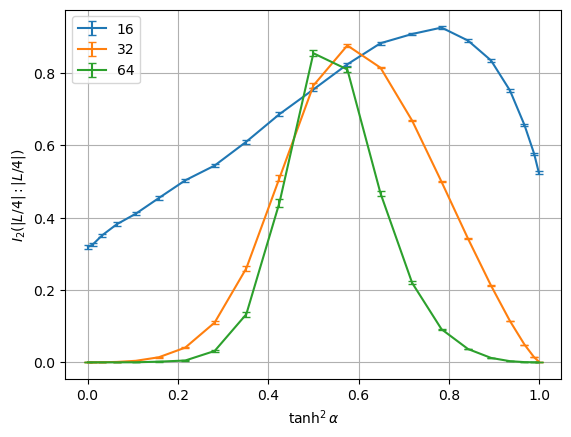

In [21]:
fig,ax=plt.subplots()
# L_list=[8,16,32,64,128,256]
for L in L_list:
    vartheta=np.linspace(0.01,0.49,MI[L].shape[0])
    # vartheta=np.linspace(0.21,0.29,MI[L].shape[0])
    ax.errorbar(x=(np.cos(vartheta*np.pi))**2,y=MI[L].mean(axis=-1),yerr=MI[L].std(axis=-1)/np.sqrt(MI[L].shape[-1]),capsize=3,label=L)
ax.legend()
ax.grid('on')
# ax.set_xlim([0,0.5])
ax.set_xlabel(r'$\tanh^2\alpha$')
# ax.set_ylabel(r'$I_2(|L/16|:|L/16|)$')
# ax.set_ylabel(r'$I_2(|L/8|:|L/8|)$')
# ax.set_ylabel(r'$I_2(|L/32|:|L/32|)$')
ax.set_ylabel(r'$I_2(|L/4|:|L/4|)$')

Text(0, 0.5, '$I_2(|L/4|:|L/4|)$')

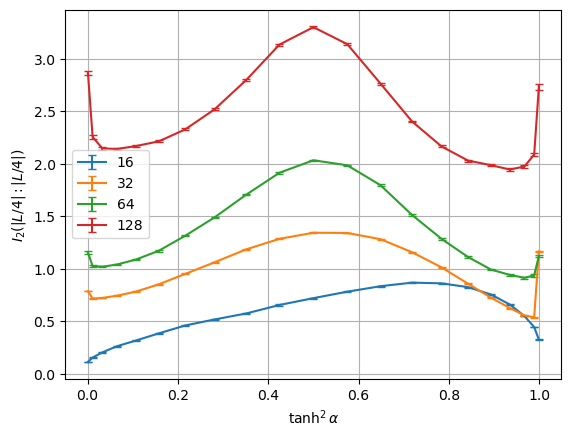

In [32]:
fig,ax=plt.subplots()
# L_list=[8,16,32,64,128,256]
for L in L_list:
    vartheta=np.linspace(0.01,0.49,MI[L].shape[0])
    # vartheta=np.linspace(0.21,0.29,MI[L].shape[0])
    ax.errorbar(x=(np.cos(vartheta*np.pi))**2,y=MI[L].mean(axis=-1),yerr=MI[L].std(axis=-1)/np.sqrt(MI[L].shape[-1]),capsize=3,label=L)
ax.legend()
ax.grid('on')
# ax.set_xlim([0,0.5])
ax.set_xlabel(r'$\tanh^2\alpha$')
# ax.set_ylabel(r'$I_2(|L/16|:|L/16|)$')
# ax.set_ylabel(r'$I_2(|L/8|:|L/8|)$')
# ax.set_ylabel(r'$I_2(|L/32|:|L/32|)$')
ax.set_ylabel(r'$I_2(|L/4|:|L/4|)$')

Text(0, 0.5, '$I_3$')

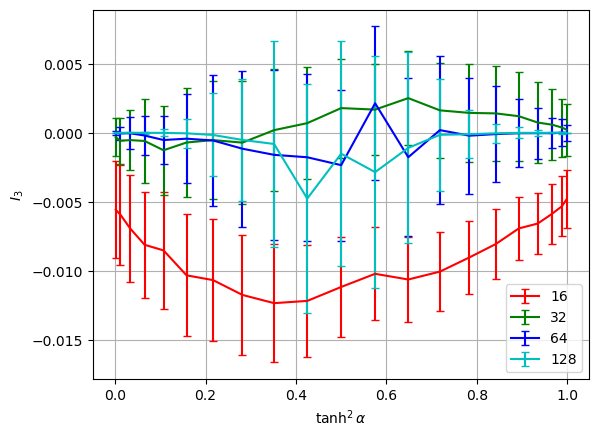

In [39]:
fig,ax=plt.subplots()
# L_list=[8,16,32,64,128,256]
color_list=iter(['r','g','b','c','m','y','k'])
for L in L_list:
    vartheta=np.linspace(0.01,0.49,TMI[L].shape[0])
    ax.errorbar(x=(np.cos(vartheta*np.pi))**2,y=TMI[L].mean(axis=-1),yerr=MI[L].std(axis=-1)/np.sqrt(MI[L].shape[-1]),capsize=3,label=L,color=next(color_list))
ax.legend()
ax.grid('on')
# ax.set_xlim([0,0.5])
ax.set_xlabel(r'$\tanh^2\alpha$')
# ax.set_ylabel(r'$I_2(|L/16|:|L/16|)$')
# ax.set_ylabel(r'$I_2(|L/8|:|L/8|)$')
ax.set_ylabel(r'$I_3$')
# ax.set_ylabel(r'$I_2(|L/4|:|L/4|)$')

In [3]:
import os

In [3]:
L_list=[32,64,128,256]
# L_list=[8,16,32,64,128,]
en={16:2000,32:2000,64:1000,128:500,256:500}
sample={16:41,32:41,64:41,128:41,256:21}
vartheta=np.linspace(0.01,0.49,21)
MI={}
TMI={}
# file_dir='nonlocal_A_new'
# file_dir='nonlocal_U_zero_theta'
# file_dir='nonlocal_U_both_zero_theta'
# file_dir='nonlocal_U_32'
# file_dir='nonlocal_U_16'
# file_dir='nonlocal_U_8'
file_dir='.'

for L in L_list:
    filename=f'class_A_vartheta(0.01,0.49,{sample[L]})_En{en[L]}_L{L}_t{L}_r0.pickle'
    with open(os.path.join(file_dir,filename),'rb') as f:
        rs=pickle.load(f)
        MI[L]=rs['MI']
        TMI[L]=rs['TMI']
    filename_2=f'class_A_vartheta(0.01,0.49,{sample[L]})_En{en[L]//2}_L{L}_t{L}_r0_double.pickle'
    try:
        with open(os.path.join(file_dir,filename_2),'rb') as f:
            rs=pickle.load(f)
            MI[L]=np.concatenate([MI[L],rs['MI']],axis=-1)
            TMI[L]=np.concatenate([TMI[L],rs['TMI']],axis=-1)
    except:
        print(f'{filename} not found')
    # write_filename=f'class_A_vartheta(0.01,0.49,{sample[L]})_En{MI[L].shape[-1]}_L{L}_t{L}_r0.pickle'
    # with open(os.path.join(file_dir,write_filename),'wb') as f:
    #     pickle.dump({'MI':MI[L],'TMI':TMI[L]},f)
        

In [16]:
ls 'class_A_vartheta(0.01,0.49,41)_En1000_L32_t32_r0_double.pickle' -lt

-rw-rw-r-- 1 hnpan hnpan 1312348 Oct  3 21:51 'class_A_vartheta(0.01,0.49,41)_En1000_L32_t32_r0_double.pickle'


In [9]:
MI[32].shape

(41, 2000)

In [5]:
MI[L].shape

(21, 500)

In [13]:
with open('./class_A_vartheta(0.01,0.49,41)_En1000_L32_t32_r0_double.pickle','rb') as f:
    rs=pickle.load(f)

In [23]:
ls 'class_A_vartheta(0.01,0.49,41)_En1000_L32_t32_r0_double.pickle'

'class_A_vartheta(0.01,0.49,41)_En1000_L32_t32_r0_double.pickle'


In [9]:
fp=os.path.join(file_dir,filename_2)

In [10]:
fp

'./class_A_vartheta(0.01,0.49,41)_En2000_L32_t32_r0_double.pickle'

In [12]:
with open('./class_A_vartheta(0.01,0.49,41)_En2000_L32_t32_r0_double.pickle','rb') as f:
    rs=pickle.load(f)

FileNotFoundError: [Errno 2] No such file or directory: './class_A_vartheta(0.01,0.49,41)_En2000_L32_t32_r0_double.pickle'

# class D

In [3]:
L_list=[8,16,32,64]
p_list=np.linspace(0.01,1,21)
MI={}
EE={}
for L in L_list:
    with open(f'class_D_p(0.00,1.00,21)_En500_L{L}_t{L}_r0.pickle','rb') as f:
        rs=pickle.load(f)
        MI[L]=rs['MI']
        EE[L]=rs['EE']
        

Text(0, 0.5, '$I_{A,B}$')

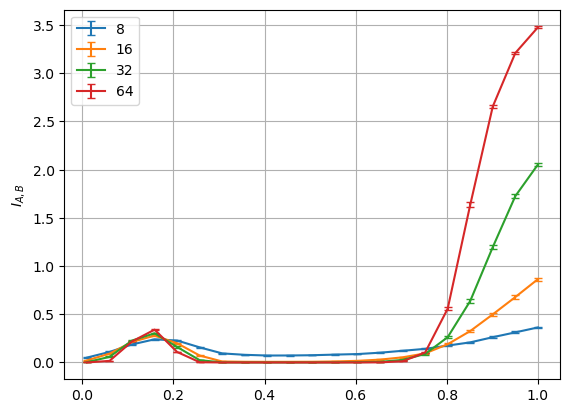

In [4]:
fig,ax=plt.subplots()
# L_list=[8,16,32,64,128,256]
for L in L_list:
    ax.errorbar(x=p_list,y=MI[L].mean(axis=-1),yerr=MI[L].std(axis=-1)/np.sqrt(MI[L].shape[-1]),capsize=3,label=L)
ax.legend()
ax.grid('on')
# ax.set_xlabel(r'$\vartheta/\pi$')
ax.set_ylabel(r'$I_{A,B}$')

Text(0, 0.5, '$S_{L/2}$')

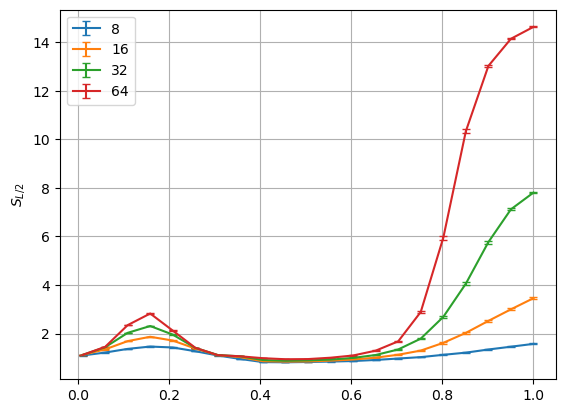

In [5]:
fig,ax=plt.subplots()
# L_list=[8,16,32,64,128,256]
for L in L_list:
    ax.errorbar(x=p_list,y=EE[L].mean(axis=-1)/np.log(2),yerr=EE[L].std(axis=-1)/np.sqrt(MI[L].shape[-1])/np.log(2),capsize=3,label=L)
ax.legend()
ax.grid('on')
# ax.set_xlabel(r'$\vartheta/\pi$')
ax.set_ylabel(r'$S_{L/2}$')